In [1]:
%load_ext sql
%sql sqlite://

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats, integrate
np.random.seed(sum(map(ord, "distributions")))

In [3]:
#install cufflinks via anaconda prompt using these commands - pip install plotly & pip install cufflinks
#install library packages
import plotly
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

In [4]:
import sqlalchemy as db

In [5]:
#Download database
ColDestination = pd.read_csv('C:\\Users\\mmora\\OneDrive\\Professional Development\\1GC_BigData\\BDAT 1000 Data Manipulation\\Assignment 2\\Migration Col to World\\Using\\BilateralMigration2017-2018.csv')

In [6]:
#Display number of rows and columns
ColDestination.shape

(217, 218)

In [7]:
#Preview the first 10 rows 
ColDestination.head(10)

,Destination,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe,Other North,Other South,World
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8566,25701,155198
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4847,1152,142577
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,63544,4750,0,0,2067,171173,342196
3,American Samoa,0,0,0,0,0,0,0,0,0,...,0,300,0,0,0,0,0,200,629,41845
4,Andorra,0,0,0,0,0,0,0,708,0,...,0,0,0,0,0,0,0,1871,603,45409
5,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2092,0,49128,51714,638499
6,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,40,0,727,0,0,0,0,419,1333,29838
7,Argentina,9,77,210,0,47,81,0,0,939,...,10915,77,0,197,1,1,21,13743,32126,2391065
8,Armenia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9511,11897,220584
9,Aruba,0,4,3,0,0,0,5,71,0,...,3421,2,0,0,0,0,0,2811,1161,40144


In [8]:
#Dropping Columns Not Needed
ColDestination.drop(ColDestination.columns.difference(['Destination','Colombia','World']), 1, inplace=True)

#Show first 10 rows
ColDestination.head(10)

,Destination,Colombia,World
0,Afghanistan,0,155198
1,Albania,0,142577
2,Algeria,0,342196
3,American Samoa,0,41845
4,Andorra,0,45409
5,Angola,0,638499
6,Antigua and Barbuda,0,29838
7,Argentina,50793,2391065
8,Armenia,0,220584
9,Aruba,9827,40144


In [9]:
#Describe the data
ColDestination.describe()

,Colombia,World
count,2.170000e+02,2.170000e+02
mean,2.535382e+04,2.452938e+06
std,2.050765e+05,1.837382e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.512800e+04
50%,0.000000e+00,2.371040e+05
75%,1.480000e+02,8.366250e+05
max,2.750889e+06,2.661438e+08


In [10]:
#Checking data type of Colombia column
print (ColDestination.dtypes)
ColDestination['Colombia'].dtypes


Destination    object
Colombia        int64
World           int64
dtype: object


dtype('int64')

In [11]:
#Sorting values descending for column Colombia
ColDestination.sort_values(by=['Colombia'], ascending=False) 

,Destination,Colombia,World
216,World,2750889,266143792
207,"Venezuela, RB",988483,1426251
203,United States,704587,47493736
175,Spain,354108,6256804
56,Ecuador,200539,452126
...,...,...,...
99,Kiribati,0,4283
100,"Korea, Dem. Rep.",0,48939
101,"Korea, Rep.",0,1233607
102,Kosovo,0,0


In [12]:
#Drop rows with Colombia = 0 (countries where Colombians didn't migrated to in 2017-2018)
ColDestination = ColDestination.drop(ColDestination[ColDestination['Colombia'] < 1].index)
ColDestination.head(10)

,Destination,Colombia,World
7,Argentina,50793,2391065
9,Aruba,9827,40144
10,Australia,18770,6875657
11,Austria,1765,1593399
13,"Bahamas, The",201,73684
18,Belgium,6351,1873511
21,Bermuda,24,23452
23,Bolivia,3085,150738
26,Brazil,8395,736913
28,Bulgaria,49,153974


In [13]:
#Sorting values descending for column Colombia and confirming that 0 values were dropped
ColDestination.sort_values(by=['Colombia'], ascending=False) 

,Destination,Colombia,World
216,World,2750889,266143792
207,"Venezuela, RB",988483,1426251
203,United States,704587,47493736
175,Spain,354108,6256804
56,Ecuador,200539,452126
...,...,...,...
200,Ukraine,14,5362652
121,Malta,11,46219
156,Romania,8,391142
106,Latvia,7,259290


In [14]:
#Drop row 217 (index 216) with World destination
ColDestination = ColDestination.drop(ColDestination[ColDestination['Colombia'] > 1000000].index)

In [15]:
ColDestination.sort_values(by=['Colombia'], ascending=False) 

,Destination,Colombia,World
207,"Venezuela, RB",988483,1426251
203,United States,704587,47493736
175,Spain,354108,6256804
56,Ecuador,200539,452126
34,Canada,70405,8078763
...,...,...,...
200,Ukraine,14,5362652
121,Malta,11,46219
156,Romania,8,391142
106,Latvia,7,259290


In [16]:
#Calculating proportion of Colombians migrating to each country in dataframe
ColDestination['ColPercent'] = (ColDestination['Colombia'] / 
                  ColDestination['Colombia'].sum()) * 100

#Calculating proportion of Colombians migrating to each country in dataframe
ColDestination['WPercent'] = (ColDestination['World'] / 
                  ColDestination['World'].sum()) * 100

In [17]:
ColDestination

,Destination,Colombia,World,ColPercent,WPercent
7,Argentina,50793,2391065,1.846421,1.417523
9,Aruba,9827,40144,0.357230,0.023799
10,Australia,18770,6875657,0.682325,4.076176
11,Austria,1765,1593399,0.064161,0.944633
13,"Bahamas, The",201,73684,0.007307,0.043683
...,...,...,...,...,...
202,United Kingdom,26623,9202494,0.967796,5.455622
203,United States,704587,47493736,25.613065,28.156269
204,Uruguay,749,91425,0.027228,0.054201
207,"Venezuela, RB",988483,1426251,35.933220,0.845541


In [18]:
#Rounding up percentages in ColPercent and WPercent
ColDestination['ColRPpercent']= round(ColDestination['ColPercent'])
ColDestination['WRPpercent']= round(ColDestination['WPercent'])

In [19]:
ColDestination

,Destination,Colombia,World,ColPercent,WPercent,ColRPpercent,WRPpercent
7,Argentina,50793,2391065,1.846421,1.417523,2.0,1.0
9,Aruba,9827,40144,0.357230,0.023799,0.0,0.0
10,Australia,18770,6875657,0.682325,4.076176,1.0,4.0
11,Austria,1765,1593399,0.064161,0.944633,0.0,1.0
13,"Bahamas, The",201,73684,0.007307,0.043683,0.0,0.0
...,...,...,...,...,...,...,...
202,United Kingdom,26623,9202494,0.967796,5.455622,1.0,5.0
203,United States,704587,47493736,25.613065,28.156269,26.0,28.0
204,Uruguay,749,91425,0.027228,0.054201,0.0,0.0
207,"Venezuela, RB",988483,1426251,35.933220,0.845541,36.0,1.0


In [20]:
#Identifying the top 10 countries Colombians have migrated to
ColDestination.nlargest(10,'Colombia')

,Destination,Colombia,World,ColPercent,WPercent,ColRPpercent,WRPpercent
207,"Venezuela, RB",988483,1426251,35.933220,0.845541,36.0,1.0
203,United States,704587,47493736,25.613065,28.156269,26.0,28.0
175,Spain,354108,6256804,12.872493,3.709295,13.0,4.0
56,Ecuador,200539,452126,7.289971,0.268039,7.0,0.0
34,Canada,70405,8078763,2.559354,4.789428,3.0,5.0
147,Panama,57051,191135,2.073911,0.113313,2.0,0.0
7,Argentina,50793,2391065,1.846421,1.417523,2.0,1.0
93,Italy,38919,5906960,1.414779,3.501892,1.0,4.0
66,France,27644,7969646,1.004912,4.724739,1.0,5.0
202,United Kingdom,26623,9202494,0.967796,5.455622,1.0,5.0


In [21]:
#Creating dataframe with only top 10 countries where Colombians migrate to 
ColDestinationTop10 = ColDestination.drop(ColDestination[ColDestination['Colombia'] < 26000].index)
ColDestinationTop10

,Destination,Colombia,World,ColPercent,WPercent,ColRPpercent,WRPpercent
7,Argentina,50793,2391065,1.846421,1.417523,2.0,1.0
34,Canada,70405,8078763,2.559354,4.789428,3.0,5.0
56,Ecuador,200539,452126,7.289971,0.268039,7.0,0.0
66,France,27644,7969646,1.004912,4.724739,1.0,5.0
93,Italy,38919,5906960,1.414779,3.501892,1.0,4.0
147,Panama,57051,191135,2.073911,0.113313,2.0,0.0
175,Spain,354108,6256804,12.872493,3.709295,13.0,4.0
202,United Kingdom,26623,9202494,0.967796,5.455622,1.0,5.0
203,United States,704587,47493736,25.613065,28.156269,26.0,28.0
207,"Venezuela, RB",988483,1426251,35.933220,0.845541,36.0,1.0


In [22]:
#Sorting Descending by Colombia
ColDestinationTop10 = ColDestinationTop10.sort_values(by='Colombia',ascending=False)
ColDestinationTop10

,Destination,Colombia,World,ColPercent,WPercent,ColRPpercent,WRPpercent
207,"Venezuela, RB",988483,1426251,35.933220,0.845541,36.0,1.0
203,United States,704587,47493736,25.613065,28.156269,26.0,28.0
175,Spain,354108,6256804,12.872493,3.709295,13.0,4.0
56,Ecuador,200539,452126,7.289971,0.268039,7.0,0.0
34,Canada,70405,8078763,2.559354,4.789428,3.0,5.0
147,Panama,57051,191135,2.073911,0.113313,2.0,0.0
7,Argentina,50793,2391065,1.846421,1.417523,2.0,1.0
93,Italy,38919,5906960,1.414779,3.501892,1.0,4.0
66,France,27644,7969646,1.004912,4.724739,1.0,5.0
202,United Kingdom,26623,9202494,0.967796,5.455622,1.0,5.0


Text(0.5, 1.0, 'Top 10 countries Colombians migrated to 2017-2018')

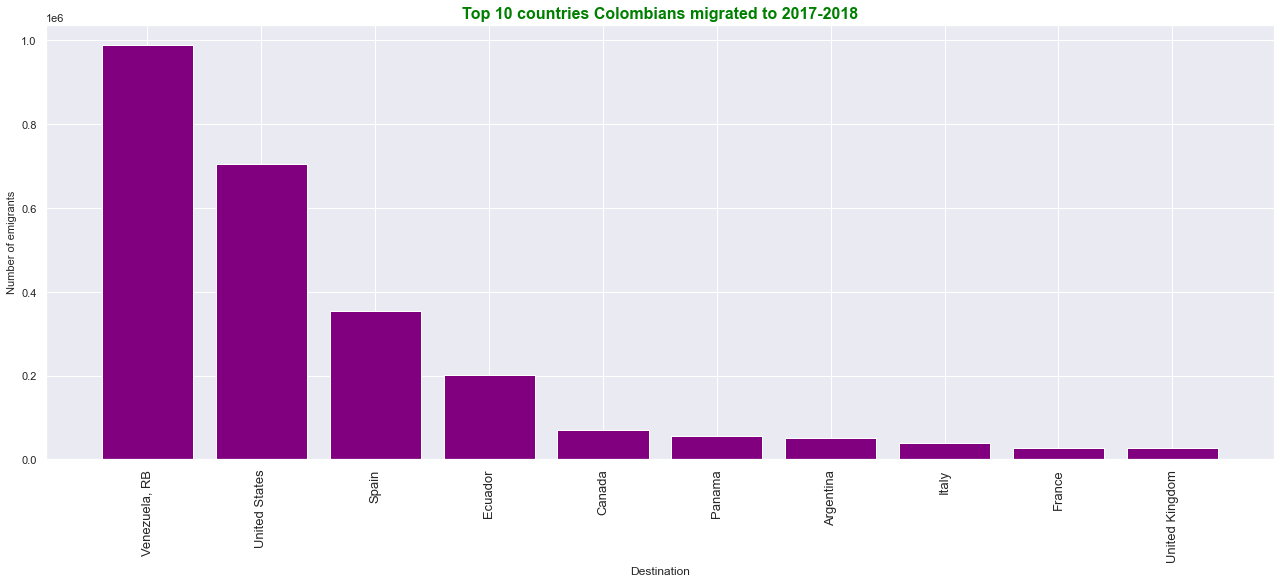

In [24]:
#Visualize Top 10 countries Colombians migrated to in 2017-2018 with matplotlib 
ColDestinationTop10 = ColDestinationTop10.sort_values(by='Colombia',ascending=False)
plt.figure(figsize = (22,8))
plt.bar(x =ColDestinationTop10['Destination'],
        height=ColDestinationTop10['Colombia'],
        color='purple')
plt.xticks(rotation=90,fontsize=13)
plt.xlabel('Destination',fontsize=12)
plt.ylabel('Number of emigrants',fontsize=11)
plt.title('Top 10 countries Colombians migrated to 2017-2018',fontsize=16, color='green', fontweight='bold')


In [25]:
#Creating a Pareto chart
from matplotlib.ticker import PercentFormatter

ColDestinationTop10 = ColDestinationTop10.sort_values(by='Colombia',ascending=False)
ColDestinationTop10["cumpercent"] = ColDestinationTop10["Colombia"].cumsum()/ColDestinationTop10["Colombia"].sum()*100

ColDestinationTop10


,Destination,Colombia,World,ColPercent,WPercent,ColRPpercent,WRPpercent,cumpercent
207,"Venezuela, RB",988483,1426251,35.933220,0.845541,36.0,1.0,39.238720
203,United States,704587,47493736,25.613065,28.156269,26.0,28.0,67.207933
175,Spain,354108,6256804,12.872493,3.709295,13.0,4.0,81.264568
56,Ecuador,200539,452126,7.289971,0.268039,7.0,0.0,89.225144
34,Canada,70405,8078763,2.559354,4.789428,3.0,5.0,92.019934
147,Panama,57051,191135,2.073911,0.113313,2.0,0.0,94.284624
7,Argentina,50793,2391065,1.846421,1.417523,2.0,1.0,96.300898
93,Italy,38919,5906960,1.414779,3.501892,1.0,4.0,97.845823
66,France,27644,7969646,1.004912,4.724739,1.0,5.0,98.943176
202,United Kingdom,26623,9202494,0.967796,5.455622,1.0,5.0,100.000000


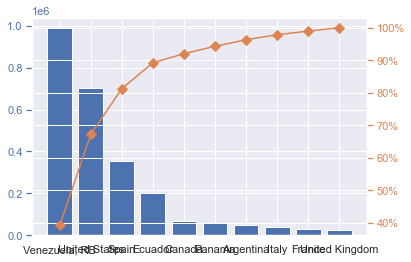

<Figure size 1584x576 with 0 Axes>

In [28]:
#Creating a Pareto chart
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots()
ax.bar(ColDestinationTop10.Destination, ColDestinationTop10["Colombia"], color="C0")
ax2 = ax.twinx()
ax2.plot(ColDestinationTop10.Destination, ColDestinationTop10["cumpercent"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.figure(figsize = (22,8))
plt.show()